In [2]:
import data_utils
import pandas as pd
import numpy as np
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('seaborn-whitegrid')
%matplotlib inline
warnings.filterwarnings('ignore')

dataset = data_utils.get_pqrd_dataset()

display(dataset.head())
dataset.shape


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_ESTADO,PQR_GRUPOALERTA,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM,year
0,bogota d.c.,de 13 a 17 años,ninguno,mujer,no aplica,bogotá,otro,no aplica,subsidiado,natural,...,juridica,escrito,pqr,cerrado,0,peticion directa,reclamo,no,trim i,2017
1,nariño,de 0 a 5 años,ninguno,hombre,no aplica,puerres,otro,no aplica,subsidiado,natural,...,natural,telefonico,pqr,cerrado,0,0,reclamo,no,trim i,2017
2,valle,de 13 a 17 años,secundaria,hombre,no aplica,cali,abuelo (a),no aplica,contributivo,natural,...,natural,telefonico,pqr,cerrado,0,0,reclamo,no,trim i,2017
3,huila,de 13 a 17 años,universitario incompleto,hombre,no aplica,neiva,padre,no aplica,contributivo,natural,...,natural,personalizado,pqr,cerrado,0,0,reclamo,no,trim i,2017
4,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,natural,personalizado,pqr,pendiente (avance),0,0,reclamo,si,trim i,2017


(2375371, 47)

In [27]:
plt.rcParams.update({'font.size': 12})

clist = ['#de411b', '#0ac3e6', '#c31900', '#9BB4BE', '#379BD7', '#eb6961', '#233237', '#285078','#690505']
n_colors = len(clist)
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

def plot_value_counts(df, feature, title, size):
    fig, ax = plt.subplots(figsize=size)
    ax  = plt.gca()
    df_plot = df[feature].value_counts().nlargest(n=5, keep='first')
    keys = list(df_plot.index)
    key_index = np.arange(len(keys))
    values = list(df_plot.values)
    ax.barh(keys, values, alpha=0.9, color=rvb(key_index/n_colors))
    ax.invert_yaxis()
    plt.show()
    


In [39]:


def plot_overlap(dataset, feature, top = 5):
    fig, ax = plt.subplots(figsize=(10,7))

    df_risk = dataset[(dataset[feature] != '0') & (dataset['RIESGO_VIDA'] == 'si')][feature].value_counts().nlargest(n = top, keep='first')
    df_risk = df_risk.to_frame().reset_index().rename(columns = {'index': feature, feature:'count'})

    df_no_risk = dataset[(dataset[feature] != '0') & (dataset['RIESGO_VIDA'] == 'no')][feature].value_counts().nlargest(n = top, keep='first')
    df_no_risk = df_no_risk.to_frame().reset_index().rename(columns = {'index': feature, feature:'count'})


    ax1 = ax.barh(df_risk[feature], df_risk['count'], alpha=0.6, label = 'Life at risk', color = '#de411b')
    ax2 = ax.barh(df_no_risk[feature], df_no_risk['count'], alpha=0.6, label = 'No life at risk', color = '#0ac3e6')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Cantidad')
    ax.set_title(feature)
    ax.legend()

    plt.xticks(rotation=45, ha='right');
    plt.show()



## Is there any part of the population more susceptible to have access to the health care system?

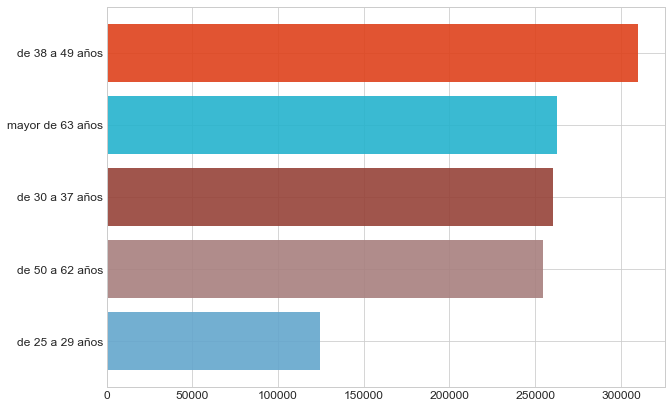

In [28]:
plot_value_counts(dataset[dataset['AFEC_EDADR'] != '0'], 'AFEC_EDADR', 'Patient\'s age range', (10,7))

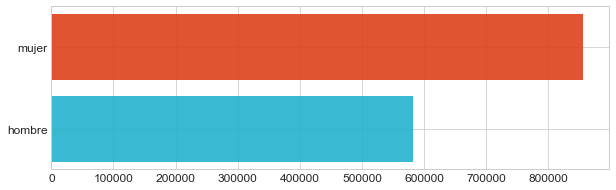

In [29]:
plot_value_counts((dataset[dataset['AFEC_GENERO'] != '0']) , 'AFEC_GENERO', 'Patient\'s gender', (10, 3))


## Top 10 of reasons to raise a pqrd.


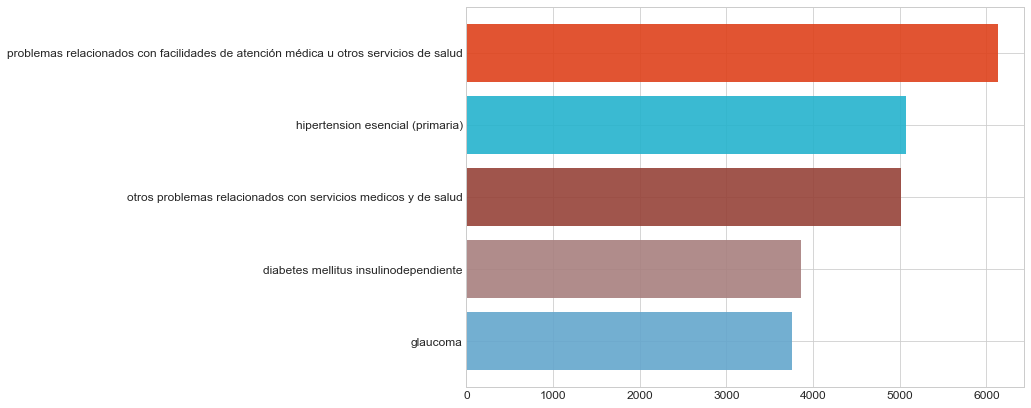

In [30]:
plot_value_counts(dataset[dataset['CIE_10'] != '0'], 'CIE_10', 'International Classification of Diseases, 10th Revision (ICD-10)', (10, 7))



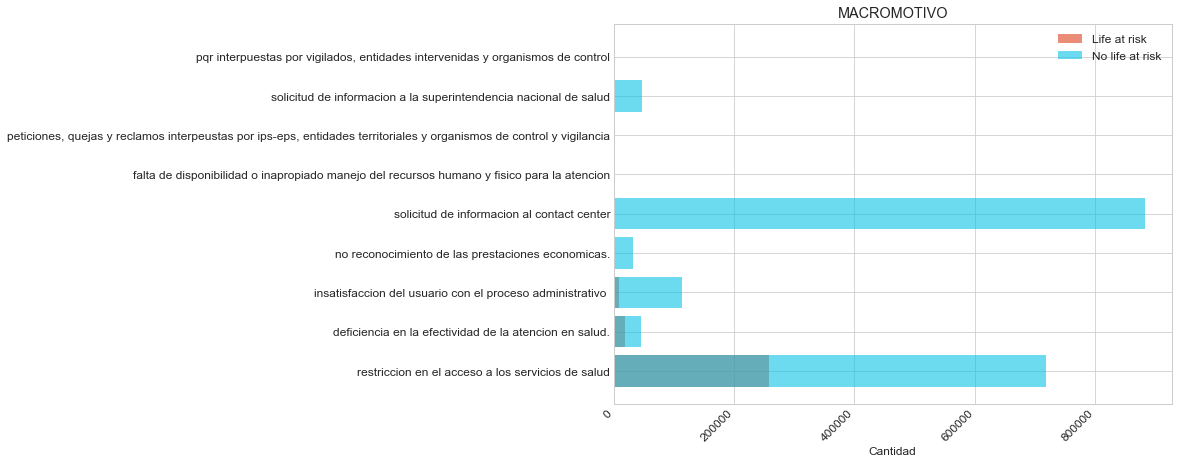

In [49]:
plot_overlap(dataset, 'MACROMOTIVO', top = 20)

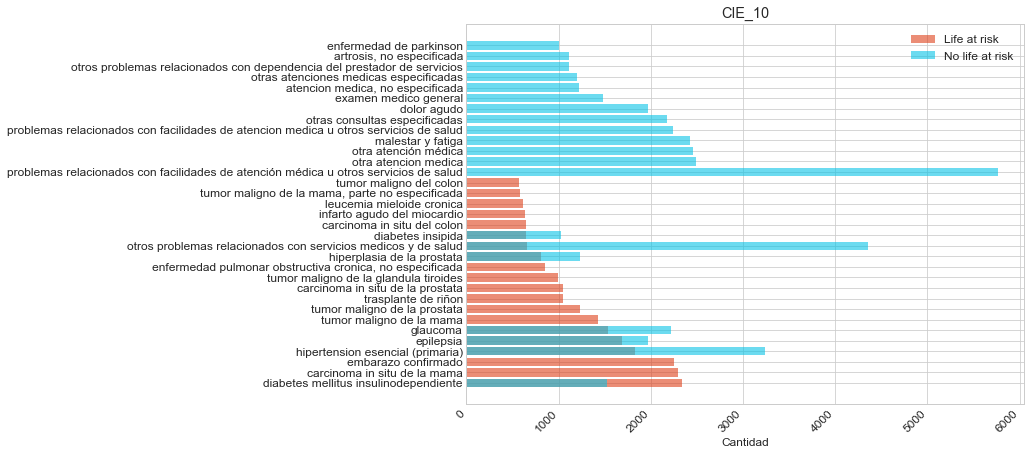

In [50]:
plot_overlap(dataset, 'CIE_10', top = 20)

# Integration with CIE 10 Dataset

In [3]:
cie10_df = pd.read_csv('datasets/CIE10.csv', sep = ';')
cie10_df['DESCRIPCION_COD_CIE_10_04'] = cie10_df['DESCRIPCION_COD_CIE_10_04'].apply(lambda value: value.lower())
dataset_cie10 = pd.merge(left = dataset.drop(['year'], axis = 1), right = cie10_df, how = 'left', left_on='CIE_10', right_on='DESCRIPCION_COD_CIE_10_04')

dataset_cie10 = dataset_cie10[dataset_cie10['CAPITULO'].notnull()]
dataset_cie10.head()


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,TRIM,CAPITULO,NOMBRE_CAPITULO,COD_CIE_10_03,DESCRIPCION_COD_CIE_10_03,COD_CIE_10_04,DESCRIPCION_COD_CIE_10_04,SEXO,LIMITE_INFERIOR_EDAD,LIMITE_SUPERIOR_EDAD
4,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,trim i,6.0,Enfermedades del sistema nervioso,G40,Epilepsia,G403,epilepsia y sindromes epilepticos idiopaticos ...,NaN,NaN,NaN
7,santander,de 13 a 17 años,secundaria,hombre,no aplica,bucaramanga,padre,no aplica,contributivo,natural,...,trim i,19.0,"Traumatismos, envenenamiento y algunas otras c...",S83,"Luxacion, Esguince Y Torcedura De Articulacion...",S833,desgarro del cartilago articular de la rodilla...,NaN,NaN,NaN
18,tolima,de 13 a 17 años,posgrado,hombre,no aplica,ibagué,padre,no aplica,régimen especial,natural,...,trim i,17.0,"Malformaciones congenitas, deformidades y anom...",Q87,Otros Sindromes De Malformaciones Congenitas E...,Q874,sindrome de marfan,NaN,NaN,NaN
19,santander,de 6 a 12 años,ninguno,mujer,no aplica,barrancabermeja,madre,persona en condición de discapacidad,contributivo,natural,...,trim i,13.0,Enfermedades del sistema osteomuscular y del t...,M72,Trastornos Fibroblasticos,M724,fibromatosis seudosarcomatosa,NaN,NaN,NaN
22,bogota d.c.,de 6 a 12 años,ninguno,hombre,no aplica,bogotá,nombre propio,no aplica,contributivo,natural,...,trim i,21.0,Factores que influyen en el estado de salud y ...,Z75,Problemas Relacionados Con Facilidades De Aten...,Z758,otros problemas relacionados con servicios med...,NaN,NaN,NaN


In [8]:
print(dataset_cie10.shape)

(175360, 55)


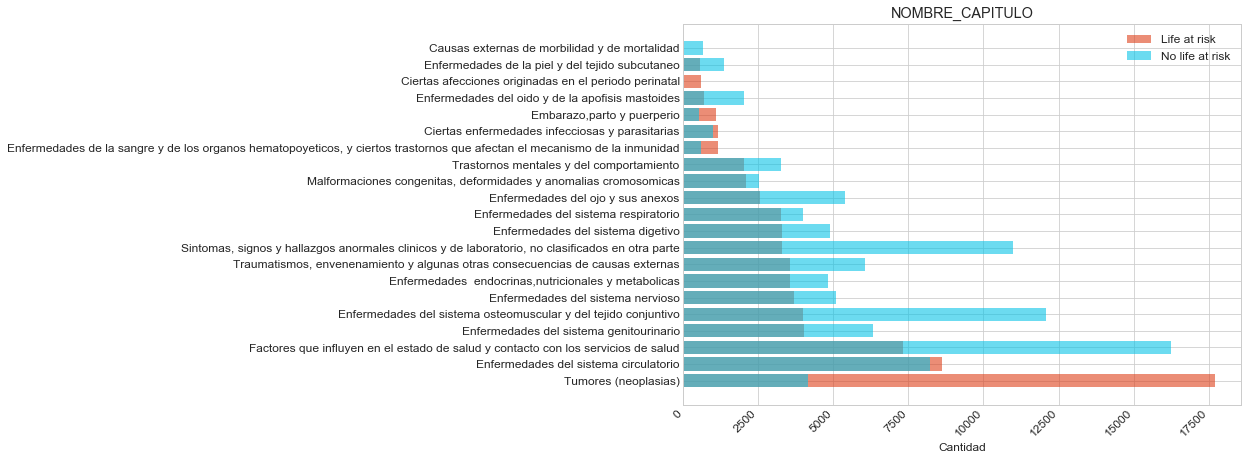

In [51]:
plot_overlap(dataset_cie10, 'NOMBRE_CAPITULO', top = 20)

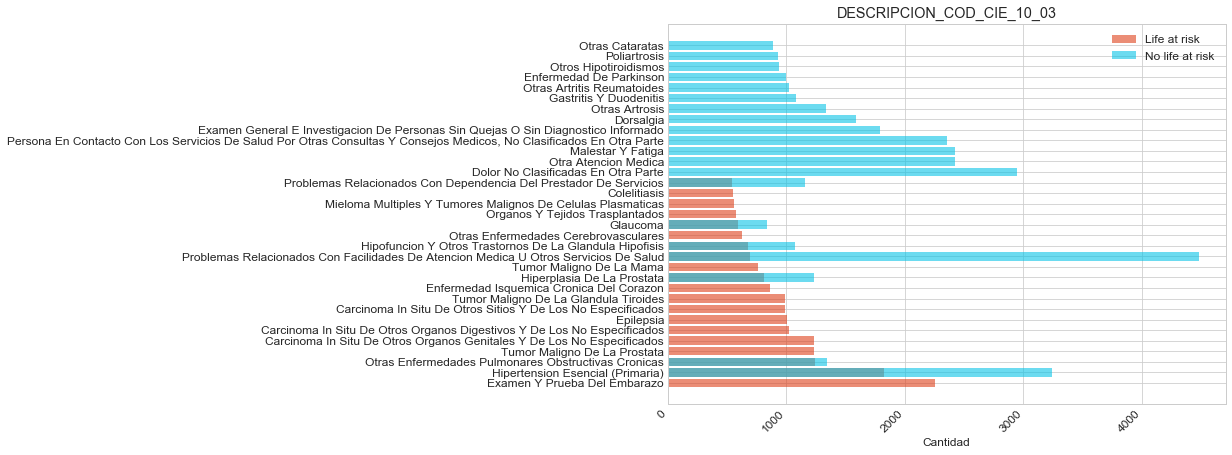

In [52]:
plot_overlap(dataset_cie10, 'DESCRIPCION_COD_CIE_10_03', top = 20)

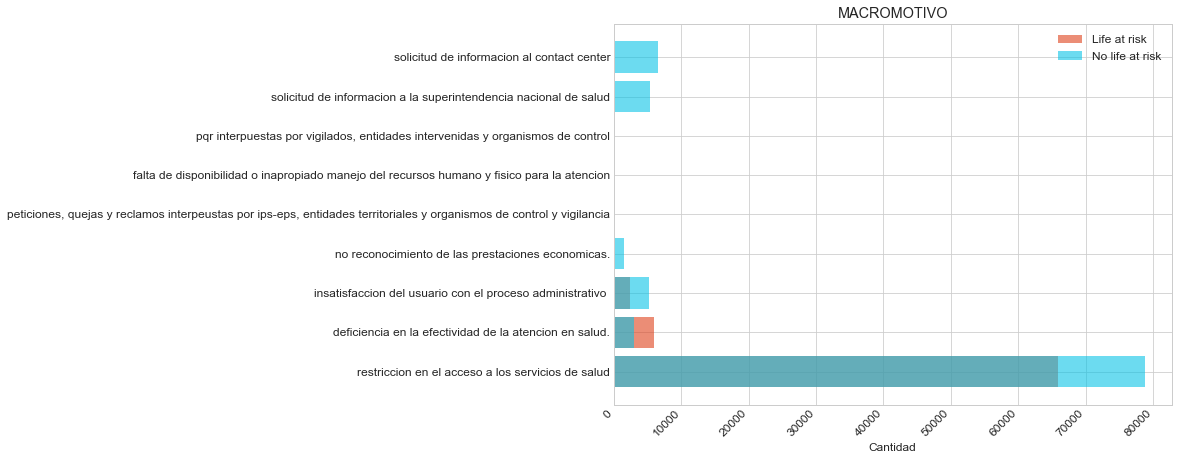

In [53]:
plot_overlap(dataset_cie10, 'MACROMOTIVO', top = 20)

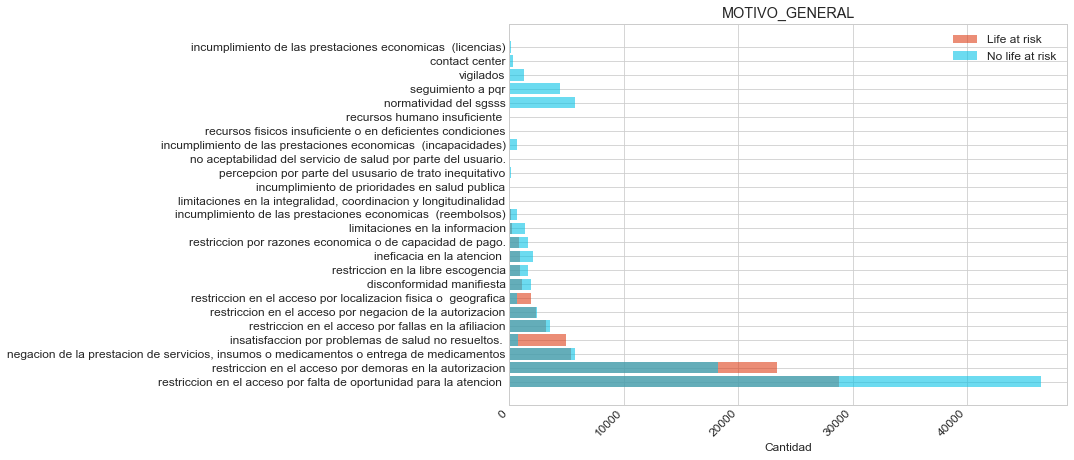

In [54]:
plot_overlap(dataset_cie10, 'MOTIVO_GENERAL', top = 20)

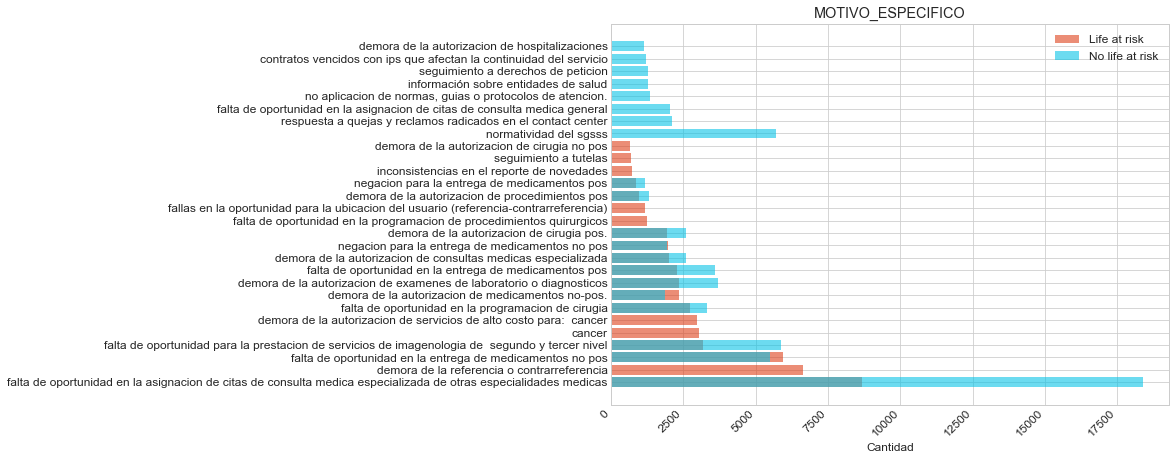

In [55]:
plot_overlap(dataset_cie10, 'MOTIVO_ESPECIFICO', top = 20)

## Use of internet for raising pqrds over the time.

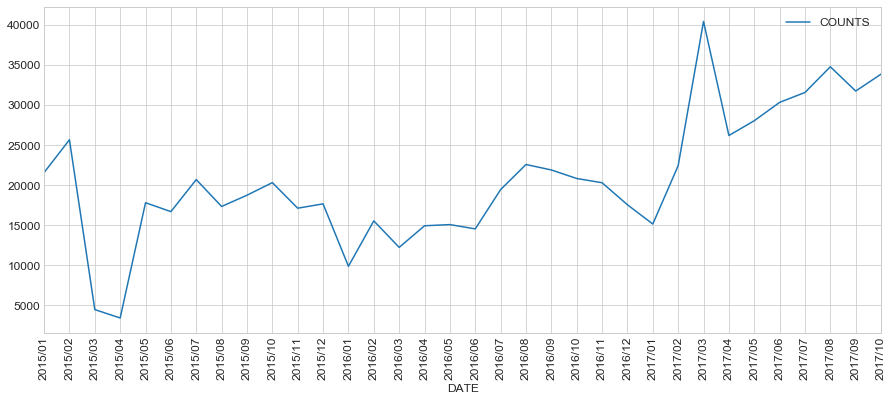

In [14]:
canales_df = dataset.loc[(dataset['PQR_CANAL'] == "chat") | (dataset['PQR_CANAL'] == "correo") | (dataset['PQR_CANAL'] == "web")]

canales_df['DATE'] = canales_df['year'].astype(str) + '/' + canales_df['MES'].astype(str)

canales_counts = canales_df['DATE'].value_counts().sort_index()
canales_counts =  pd.DataFrame({'DATE':canales_counts.index, 'COUNTS':canales_counts.values})

canales_counts.plot(kind='line',x='DATE',y='COUNTS', xticks=canales_counts.index, figsize=(15,6), rot=90);




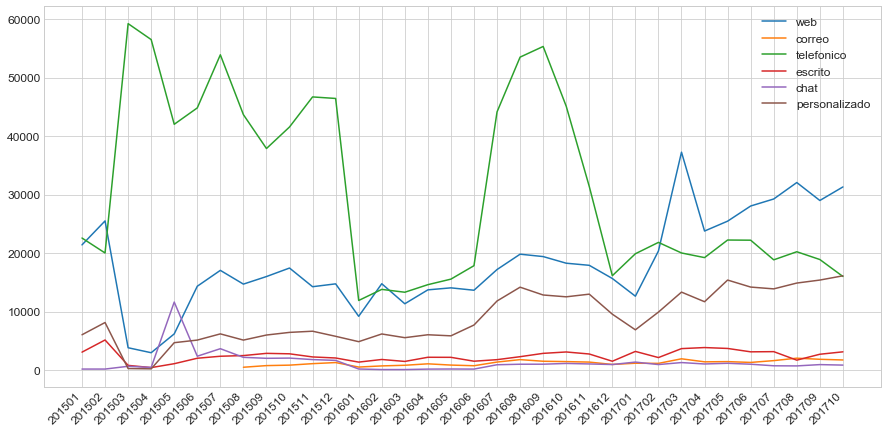

In [15]:
fig, ax = plt.subplots(figsize=(15,7))
canales = set(dataset[dataset['PQR_CANAL'] != '0']['PQR_CANAL'].values)
for canal in canales:
    canales_df = dataset[dataset['PQR_CANAL'] == canal]

    canales_df['DATE'] = canales_df['year'].astype(str) + canales_df['MES'].astype(str)

    canales_counts = canales_df['DATE'].value_counts().sort_index()
    canales_counts =  pd.DataFrame({'DATE':canales_counts.index, 'COUNTS':canales_counts.values})

    ax.plot(canales_counts['DATE'], canales_counts['COUNTS'], label = canal)
    ax.legend()

plt.xticks(rotation=45, ha='right');
plt.show()

In [5]:
cie10_df[cie10_df['SEXO'] == 1].head()

,CAPITULO,NOMBRE_CAPITULO,COD_CIE_10_03,DESCRIPCION_COD_CIE_10_03,COD_CIE_10_04,DESCRIPCION_COD_CIE_10_04,SEXO,LIMITE_INFERIOR_EDAD,LIMITE_SUPERIOR_EDAD
482,1,Ciertas enfermedades infecciosas y parasitarias,B26,Parotiditis Infecciosa,B260,orquitis por parotiditis,1.0,028D,120A
1039,2,Tumores (neoplasias),C60,Tumor Maligno Del Pene,C600,tumor maligno del prepucio,1.0,NaN,NaN
1040,2,Tumores (neoplasias),C60,Tumor Maligno Del Pene,C601,tumor maligno del glande,1.0,NaN,NaN
1041,2,Tumores (neoplasias),C60,Tumor Maligno Del Pene,C602,tumor maligno del cuerpo del pene,1.0,NaN,NaN
1042,2,Tumores (neoplasias),C60,Tumor Maligno Del Pene,C608,lesion de sitios contiguos del pene,1.0,NaN,NaN


In [8]:
cie10_df[cie10_df['LIMITE_INFERIOR_EDAD'].notnull()].head()

,CAPITULO,NOMBRE_CAPITULO,COD_CIE_10_03,DESCRIPCION_COD_CIE_10_03,COD_CIE_10_04,DESCRIPCION_COD_CIE_10_04,SEXO,LIMITE_INFERIOR_EDAD,LIMITE_SUPERIOR_EDAD
59,1,Ciertas enfermedades infecciosas y parasitarias,A15,"Tuberculosis Respiratoria, Confirmada Bacterio...",A150,"tuberculosis del pulmon, confirmada por hallaz...",NaN,028D,120A
60,1,Ciertas enfermedades infecciosas y parasitarias,A15,"Tuberculosis Respiratoria, Confirmada Bacterio...",A151,"tuberculosis del pulmon, confirmada unicamente...",NaN,028D,120A
61,1,Ciertas enfermedades infecciosas y parasitarias,A15,"Tuberculosis Respiratoria, Confirmada Bacterio...",A152,"tuberculosis del pulmon, confirmada histologic...",NaN,028D,120A
62,1,Ciertas enfermedades infecciosas y parasitarias,A15,"Tuberculosis Respiratoria, Confirmada Bacterio...",A153,"tuberculosis del pulmon, confirmada por medios...",NaN,028D,120A
63,1,Ciertas enfermedades infecciosas y parasitarias,A15,"Tuberculosis Respiratoria, Confirmada Bacterio...",A154,tuberculosis de ganglios linfaticos intratorac...,NaN,028D,120A
